In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# **I- Pakcages**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output

In [8]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
X = data.iloc[:,1:]
X = X.to_numpy()
y = data["label"].to_numpy()

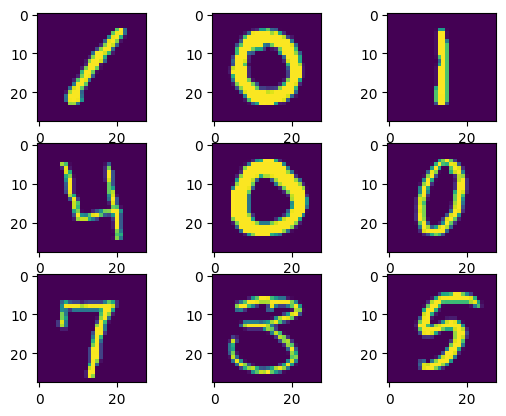

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3)
cnt = 0
for i in range(0,3):
    for j in range(0,3):
        ax[i,j].imshow(X[cnt].reshape(28,28))
        cnt += 1

In [13]:
mean_variance = []
for i in variance:
    mean_variance.append(i.mean())
    np.cumsum

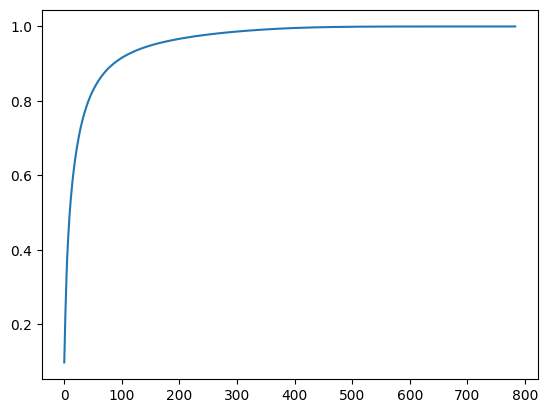

In [14]:
model = PCA(n_components=None)
model.fit(X,y)
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [15]:
pca = PCA(n_components=200)
pca.fit(X,y)

PCA(n_components=200)

In [16]:
X_pca=pca.fit_transform(X)

## Splite data

In [17]:
X_train ,X_test, y_train , y_test = train_test_split(X_pca,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33600, 200) (8400, 200) (33600,) (8400,)


# II- Model : 

In [146]:
models = [BernoulliNB(),GaussianNB() ,XGBClassifier(),MLPClassifier()]

cv_score = []
acc_score = []
best_acc = 0

for m in models:
    clear_output()
    print("models: ",m)
    
    model = m
    model.fit(X_train,y_train)
    
    
    score = m.score(X_test,y_test)
    print("score :",score)
    acc_score.append(score)
    
    cv = cross_val_score(model,X_test,y_test,cv=3)
    print("cv: ",cv)
    cv_score.append(cv)

models:  MLPClassifier()
score : 0.9477380952380953
cv:  [0.83607143 0.84678571 0.84821429]


In [186]:
mean_cv_score = []

for i in cv_score:
    mean_cv_score.append(i.mean())
    
mean_cv_score

[0.7247619047619048,
 0.8328571428571429,
 0.9142857142857143,
 0.8436904761904761]

<BarContainer object of 4 artists>

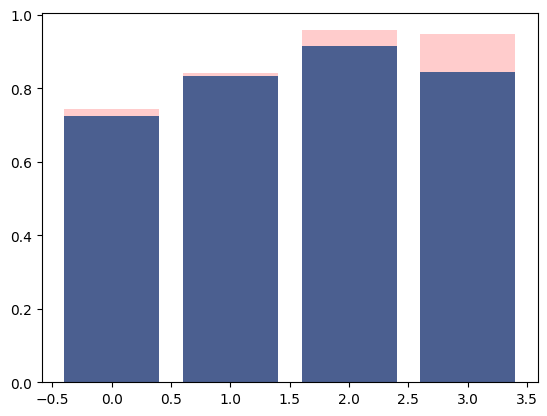

In [193]:
plt.bar(range(len(mean_cv_score)),mean_cv_score,label='cross_validation')
plt.bar(range(len(acc_score)), acc_score, color='red', alpha=0.2, label='Accuracy Score')

## II- Parametrs

In [26]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       866
           1       0.98      0.98      0.98       937
           2       0.95      0.96      0.96       781
           3       0.94      0.95      0.95       837
           4       0.96      0.95      0.95       793
           5       0.95      0.95      0.95       774
           6       0.97      0.96      0.97       869
           7       0.96      0.97      0.96       907
           8       0.94      0.93      0.94       774
           9       0.94      0.95      0.94       862

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



<Axes: >

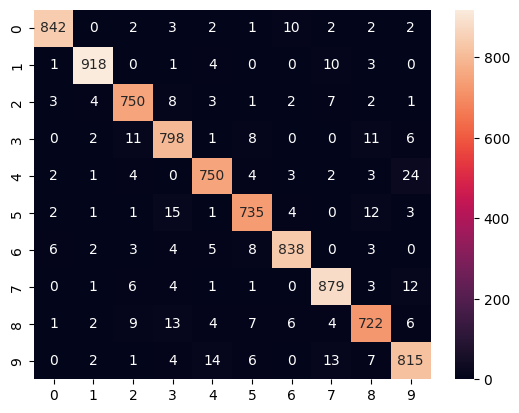

In [28]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt=".0f")

In [259]:
params = {
    'max_depth': [1,2,3,4,5,6,7,8,9]
}

In [272]:
acc_score_s = []
cv_score_s = []
pra = [1,2,3,4,5,6,7,8,9]

for i in pra:
    clear_output()
    print("par: ",i)
    
    model_s = XGBClassifier(max_depth=i)
    model_s.fit(X_train,y_train)
    
    
    score = model_s.score(X_test,y_test)
    print("score :",score)
    acc_score_s.append(score)
    
    cv = cross_val_score(model_s,X_test,y_test,cv=3)
    print("cv: ",cv)
    cv_score_s.append(cv.mean())


par:  9
score : 0.9557142857142857
cv:  [0.90964286 0.91642857 0.91107143]


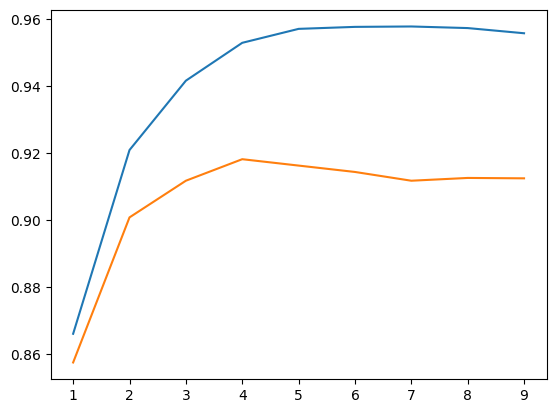

In [275]:
plt.plot(pra,acc_score_s)
plt.plot(pra,cv_score_s,label='cross_validation')


In [18]:
acc_score_eta = []
cv_score_eta = []
eta = [0.0001,0.001,0.01,0.2,0.6,1,10]

for i in eta:
    clear_output()
    print("par: ",i)
    
    model_s = XGBClassifier(eta=i)
    model_s.fit(X_train,y_train)
    print("end trainig")
    
    
    score = model_s.score(X_test,y_test)
    print("score :",score)
    acc_score_eta.append(score)
    
    cv = cross_val_score(model_s,X_test,y_test,cv=3)
    print("cv: ",cv)
    cv_score_eta.append(cv.mean())

par:  10
end trainig
score : 0.20083333333333334
cv:  [0.25607143 0.215      0.29928571]


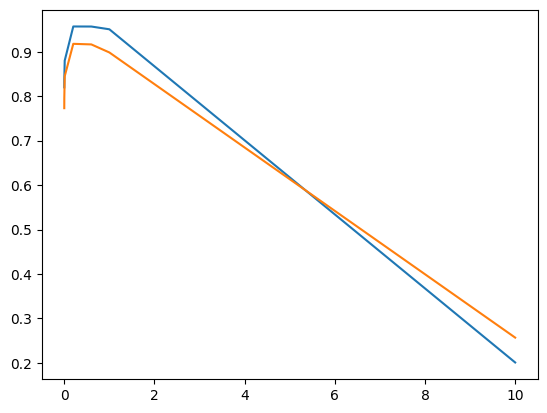

In [19]:
plt.plot(eta,acc_score_eta)
plt.plot(eta,cv_score_eta,label='cross_validation')

In [25]:
cv_score_eta.index(max(cv_score_eta))
eta[3]

0.2

## Best model

In [29]:
model = XGBClassifier(eta=0.2,max_depth=4)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       867
           1       0.98      0.98      0.98       939
           2       0.93      0.95      0.94       772
           3       0.93      0.93      0.93       850
           4       0.95      0.92      0.93       805
           5       0.92      0.93      0.93       770
           6       0.97      0.96      0.97       873
           7       0.95      0.96      0.96       909
           8       0.92      0.92      0.92       764
           9       0.91      0.93      0.92       851

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



<Axes: >

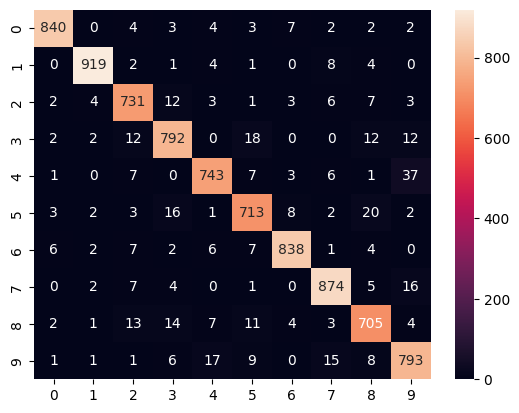

In [31]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt=".0f")

## VIII- Export the model

In [ ]:
import pickle

with open('./digits_recognition_LR.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
print("done")